# Learning goals: 
 - Data integration 
 
 For this lab, we will work on a dataset of electricity from Belgium. 

### Import Required modules

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [28]:
elct_df = pd.read_csv('Electricity Data 2016_2017.csv')
elct_df.head()

,Date,Time,Consumption
0,12/1/2017,0:00:00,72650.0
1,12/1/2017,0:15:00,72524.0
2,12/1/2017,0:30:00,70553.0
3,12/1/2017,0:45:00,69291.0
4,12/1/2017,1:00:00,68277.0


In [29]:
date_df = elct_df.Date.str.split('/',expand=True)
date_df.columns = ['Month','Day','Year']
elct_df = elct_df.join(date_df)

BM = elct_df.Year == '2016'
elct_df = elct_df[BM]

elct_df.head()

,Date,Time,Consumption,Month,Day,Year
2976,12/31/2016,0:00,74259.0,12,31,2016
2977,12/31/2016,0:15,NaN,12,31,2016
2978,12/31/2016,0:30,72715.0,12,31,2016
2979,12/31/2016,0:45,NaN,12,31,2016
2980,12/31/2016,1:00,70283.0,12,31,2016


In [30]:
import datetime
def WeekDayRetrieve(row):
    Year = int(row['Year'])
    Month = int(row['Month'])
    Day = int(row['Day']) 
    TheDate = datetime.date(Year, Month, Day).weekday()
    DictWeekday = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
    return DictWeekday[TheDate]

In [31]:
WeekDaySerries = date_df.apply(WeekDayRetrieve, axis=1)
dfToJoin = pd.DataFrame(WeekDaySerries)
dfToJoin.columns = ['Weekday']
elct_df = elct_df.join(dfToJoin)

time_df = elct_df.Time.str.split(':', expand=True)
time_df.columns = ['Hour','Min']
elct_df = elct_df.join(time_df)

elct_df.head(100)

,Date,Time,Consumption,Month,Day,Year,Weekday,Hour,Min
2976,12/31/2016,0:00,74259.0,12,31,2016,Fri,0,00
2977,12/31/2016,0:15,NaN,12,31,2016,Fri,0,15
2978,12/31/2016,0:30,72715.0,12,31,2016,Fri,0,30
2979,12/31/2016,0:45,NaN,12,31,2016,Fri,0,45
2980,12/31/2016,1:00,70283.0,12,31,2016,Fri,1,00
...,...,...,...,...,...,...,...,...,...
3071,12/31/2016,23:45,NaN,12,31,2016,Fri,23,45
3072,12/30/2016,0:00,72396.0,12,30,2016,Thu,0,00
3073,12/30/2016,0:15,NaN,12,30,2016,Thu,0,15
3074,12/30/2016,0:30,70861.0,12,30,2016,Thu,0,30


In [32]:
def MissingValueReprots(df):
    print('The number of rows:', len(df))

    print('The number of Missing Values:', df.Consumption.isnull().astype(int).sum())
    
MissingValueReprots(elct_df)

The number of rows: 35136
The number of Missing Values: 17571


In [33]:
BM = (elct_df.Min == '15') | (elct_df.Min == '45')

elct_df = elct_df[~BM]
elct_df = elct_df.reset_index().drop(columns=['index'])

MissingValueReprots(elct_df)

The number of rows: 17568
The number of Missing Values: 3


In [34]:
elct_df.Consumption = elct_df.Consumption.interpolate(method='linear')
MissingValueReprots(elct_df)

The number of rows: 17568
The number of Missing Values: 0


In [36]:
elct_df.head()

,Date,Time,Consumption,Month,Day,Year,Weekday,Hour,Min
0,12/31/2016,0:00,74259.0,12,31,2016,Fri,0,00
1,12/31/2016,0:30,72715.0,12,31,2016,Fri,0,30
2,12/31/2016,1:00,70283.0,12,31,2016,Fri,1,00
3,12/31/2016,1:30,69981.0,12,31,2016,Fri,1,30
4,12/31/2016,2:00,69389.0,12,31,2016,Fri,2,00


# Example #2 

The electricity consumption data is presented in elect_df for every half an hour. The Temperature_2016.csv also provide the weather data of the same region. Integrate the data and answer if the amount of electricity consumption has a relationship with the weather.


In [37]:
temp_df = pd.read_csv('Temperature 2016.csv')
temp_df.head()

,Date,temp
0,2016-01-01T00:00:00,79.0
1,2016-01-01T01:00:00,79.0
2,2016-01-01T02:00:00,77.5
3,2016-01-01T03:00:00,79.0
4,2016-01-01T04:00:00,77.0


In [38]:
temp_df.columns = ['Date','temp']
temp_df.head()

,Date,temp
0,2016-01-01T00:00:00,79.0
1,2016-01-01T01:00:00,79.0
2,2016-01-01T02:00:00,77.5
3,2016-01-01T03:00:00,79.0
4,2016-01-01T04:00:00,77.0


In [39]:
temp_df.head()

,Date,temp
0,2016-01-01T00:00:00,79.0
1,2016-01-01T01:00:00,79.0
2,2016-01-01T02:00:00,77.5
3,2016-01-01T03:00:00,79.0
4,2016-01-01T04:00:00,77.0


# Challenges to integrating data
- Aggregation Mismatch: temp_df is hourly, but elec_df is every 30 minutes.
- Entity Identification: The data Time notations are different across the two data


In [40]:
# Aggregation Mismatch
elct_df.groupby(['Date','Hour']).Consumption.sum()


Date      Hour
1/1/2016  0       119052.0
          1       113138.0
          10      101915.0
          11      105796.0
          12      109960.0
                    ...   
9/9/2016  5        77492.0
          6        84960.0
          7        94969.0
          8        99795.0
          9       104091.0
Name: Consumption, Length: 8784, dtype: float64

In [41]:
ag_elect_df = pd.DataFrame(elct_df.groupby(['Date','Hour']).Consumption.sum()).reset_index()
ag_elect_df

,Date,Hour,Consumption
0,1/1/2016,0,119052.0
1,1/1/2016,1,113138.0
2,1/1/2016,10,101915.0
3,1/1/2016,11,105796.0
4,1/1/2016,12,109960.0
...,...,...,...
8779,9/9/2016,5,77492.0
8780,9/9/2016,6,84960.0
8781,9/9/2016,7,94969.0
8782,9/9/2016,8,99795.0


In [42]:
ag_elect_df['DateHour'] = ag_elect_df.apply(lambda r: '{} {}'.format(r.Date,r.Hour),axis=1)
ag_elect_df

,Date,Hour,Consumption,DateHour
0,1/1/2016,0,119052.0,1/1/2016 0
1,1/1/2016,1,113138.0,1/1/2016 1
2,1/1/2016,10,101915.0,1/1/2016 10
3,1/1/2016,11,105796.0,1/1/2016 11
4,1/1/2016,12,109960.0,1/1/2016 12
...,...,...,...,...
8779,9/9/2016,5,77492.0,9/9/2016 5
8780,9/9/2016,6,84960.0,9/9/2016 6
8781,9/9/2016,7,94969.0,9/9/2016 7
8782,9/9/2016,8,99795.0,9/9/2016 8


In [43]:
ag_elect_df.set_index('DateHour',drop=True,inplace=True)
ag_elect_df

,Date,Hour,Consumption
DateHour,,,
1/1/2016 0,1/1/2016,0,119052.0
1/1/2016 1,1/1/2016,1,113138.0
1/1/2016 10,1/1/2016,10,101915.0
1/1/2016 11,1/1/2016,11,105796.0
1/1/2016 12,1/1/2016,12,109960.0
...,...,...,...
9/9/2016 5,9/9/2016,5,77492.0
9/9/2016 6,9/9/2016,6,84960.0
9/9/2016 7,9/9/2016,7,94969.0


In [44]:
ag_elect_df.drop(columns=['Date','Hour'],inplace=True)
ag_elect_df

,Consumption
DateHour,
1/1/2016 0,119052.0
1/1/2016 1,113138.0
1/1/2016 10,101915.0
1/1/2016 11,105796.0
1/1/2016 12,109960.0
...,...
9/9/2016 5,77492.0
9/9/2016 6,84960.0
9/9/2016 7,94969.0


In [45]:
ag_elect_df.iloc[0:2000:30]

,Consumption
DateHour,
1/1/2016 0,119052.0
1/10/2016 14,119058.0
1/11/2016 2,113057.0
1/12/2016 4,113797.0
1/14/2016 0,140078.0
...,...
11/23/2016 2,108031.0
11/24/2016 4,98414.0
11/26/2016 0,121047.0


In [46]:
temp_df.head()

,Date,temp
0,2016-01-01T00:00:00,79.0
1,2016-01-01T01:00:00,79.0
2,2016-01-01T02:00:00,77.5
3,2016-01-01T03:00:00,79.0
4,2016-01-01T04:00:00,77.0


In [47]:
def DateHourFromat(v):
    Year = v[:4]
    Month = str(int(v[5:7]))
    Day = str(int(v[8:10]))
    Hour = str(int(v[11:13]))
    
    return '{}/{}/{} {}'.format(Day,Month,Year,Hour)

In [48]:
temp_df['DateHour'] = temp_df.Date.apply(DateHourFromat)
temp_df

,Date,temp,DateHour
0,2016-01-01T00:00:00,79.0,1/1/2016 0
1,2016-01-01T01:00:00,79.0,1/1/2016 1
2,2016-01-01T02:00:00,77.5,1/1/2016 2
3,2016-01-01T03:00:00,79.0,1/1/2016 3
4,2016-01-01T04:00:00,77.0,1/1/2016 4
...,...,...,...
8727,2016-12-31T19:00:00,79.0,31/12/2016 19
8728,2016-12-31T20:00:00,77.0,31/12/2016 20
8729,2016-12-31T21:00:00,77.0,31/12/2016 21
8730,2016-12-31T22:00:00,77.0,31/12/2016 22


In [49]:
temp_df = temp_df.set_index('DateHour',drop=True)
temp_df

,Date,temp
DateHour,,
1/1/2016 0,2016-01-01T00:00:00,79.0
1/1/2016 1,2016-01-01T01:00:00,79.0
1/1/2016 2,2016-01-01T02:00:00,77.5
1/1/2016 3,2016-01-01T03:00:00,79.0
1/1/2016 4,2016-01-01T04:00:00,77.0
...,...,...
31/12/2016 19,2016-12-31T19:00:00,79.0
31/12/2016 20,2016-12-31T20:00:00,77.0
31/12/2016 21,2016-12-31T21:00:00,77.0


In [50]:
temp_df.drop(columns=['Date'],inplace=True)
temp_df

,temp
DateHour,
1/1/2016 0,79.0
1/1/2016 1,79.0
1/1/2016 2,77.5
1/1/2016 3,79.0
1/1/2016 4,77.0
...,...
31/12/2016 19,79.0
31/12/2016 20,77.0
31/12/2016 21,77.0


In [53]:
# Integrate

integreated_df = ag_elect_df.join(temp_df)

In [54]:
integreated_df.head()

,Consumption,temp
DateHour,,
1/1/2016 0,119052.0,79.0
1/1/2016 1,113138.0,79.0
1/1/2016 10,101915.0,82.0
1/1/2016 11,105796.0,82.5
1/1/2016 12,109960.0,81.0


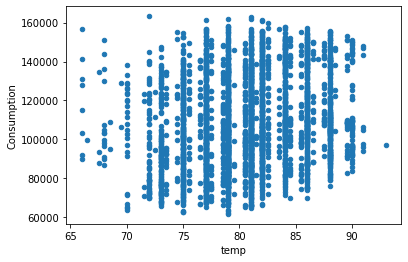

In [24]:
integreated_df.plot(kind='scatter',y='Consumption',x='temp')

In [25]:
integreated_df.corr()

,Consumption,temp
Consumption,1.000000,0.187056
temp,0.187056,1.000000
